<a href="https://colab.research.google.com/github/JyresaMae/Digital-Signal-Processing/blob/main/Non_Periodic_Signals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 3.1:
In the leakage example, try replacing the Hamming window with one of the other
windows provided by NumPy, and see what effect they have on leakage. See
http://docs.scipy.org/doc/numpy/reference/routines.window.html

NumPy (imported as `np`) and Matplotlib.pyplot (imported as `plt`) libraries are imported. Additionally, the `decorate` function from the `thinkdsp` module is also imported. These libraries and the "decorate" function will be used later in the code for numerical operations, plotting, and labeling.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

`SinSignal` class from the `thinkdsp` module. The sinusoidal signal is generated with a frequency of 440 Hz. The variable `duration` is set to 30.25 periods of this sinusoidal signal, effectively specifying how long the signal should be. Then, a waveform (wave) is created from this signal, and its corresponding spectrum is computed.

In [4]:
from thinkdsp import SinSignal

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

Plotting the original spectrum of the sinusoidal signal. This is achieved using the `plot` method of the spectrum object. The `high` parameter is set to 880 Hz, limiting the x-axis (frequency) range of the plot, and the "decorate" function is used to add an x-axis label indicating the frequency in Hertz.

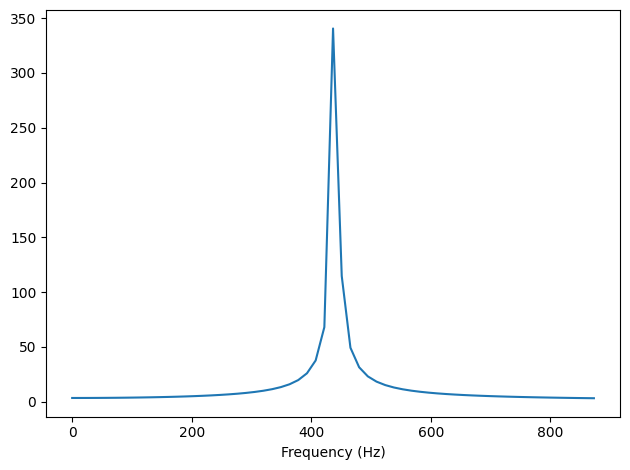

In [5]:
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

The following figure shows the effect of 4 different windows (`Bartlett`, `Blackman`, `Hamming`, and `Hanning`) .
It does this using a loop that iterates through each window function. For each window function:

* A new waveform is created by copying the original signal.
* The samples of the waveform (`wave.ys`) are multiplied by the current window function (e.g., Bartlett, Blackman, etc.), effectively applying the window to the waveform.
* A new spectrum is computed from the modified waveform.
* The spectrum of the modified waveform is plotted with a frequency limit of 880 Hz, and a label is added to the plot indicating the name of the window function used.

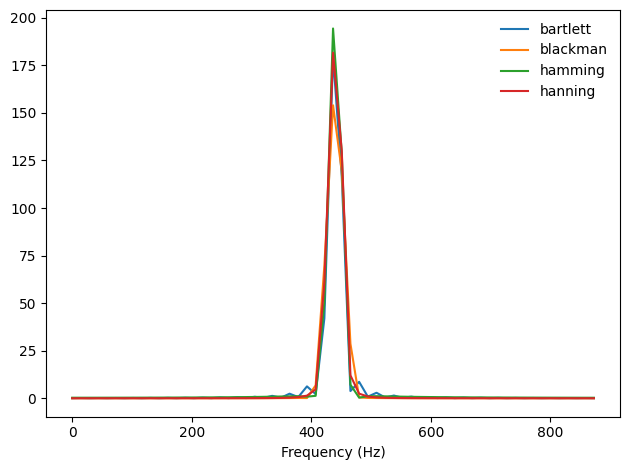

In [10]:
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)

decorate(xlabel='Frequency (Hz)')

 All four window functions effectively reduce spectral leakage in the signal.However, the Bartlett window introduced some residual "ringing" artifacts in the spectrum, while the Hamming window was the most efficient in preserving the signal's energy content. The choice of window function should be made based on the specific analysis requirements and trade-offs between leakage reduction and other considerations like spectral resolution and energy preservation.

### Exercise 3.2:
Write a class called `SawtoothChirp` that extends `Chirp` and overrides evaluate to
generate a sawtooth waveform with frequency that increases (or decreases) linearly.

__Hint: Combine the evaluate functions from `Chirp` and `SawtoothSignal`.__

Draw a sketch of what you think the spectrogram of this signal looks like, and then plot
it. The effect of aliasing should be visually apparent, and if you listen carefully, you can hear
it.

The `Chirp` class is imported from the `thinkdsp` module, which is used for generating signals. Additionally, the `normalize` and `unbias` functions are imported from the same module, which are typically used for signal processing tasks. The constant `PI2` is defined as 2 times the mathematical constant pi (π). Following that, a new class called `SawtoothChirp` is defined as a subclass of `Chirp`. The docstrings provide descriptions of the class and its evaluate method. The `evaluate` method is overridden to create a sawtooth signal with a varying frequency. It calculates the phases, cycles, and fractions of the cycles for each time step and returns the generated waveform samples.

In [24]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi

class SawtoothChirp(Chirp):

    def evaluate(self, ts):
        """Helper function that evaluates the signal.

        ts: float array of times
        """
        freqs = np.linspace(self.start, self.end, len(ts))
        "dts between consecutive time values"
        dts = np.diff(ts, prepend=0)
        """dphis for each time step based on the
        corresponding frequency and time difference
        """
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        """The fractional part of the cycle is taken using np.modf,
        and this fraction represents the position within the sawtooth wave
        """
        frac, _ = np.modf(cycles)
        """This line takes the fractional values frac, unbias them
        (shifts them to be centered around 0), and then normalizes them
        (scales them to have the specified amplitude self.amp).
        The result is an array ys that contains the
        waveform samples of the sawtooth signal.
        """
        ys =  normalize(unbias(frac), self.amp)
        return ys

`SawtoothChirp` class is created and assigned to the variable `signal`. It is configured to start with a frequency of 220 Hz and end with a frequency of 880 Hz. Then, a waveform (`wave`) is generated from this signal with a duration of 1 second and a frame rate of 4000 frames per second. The waveform is apodized to smooth the edges, and then its audio is played.

In [21]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

 A `spectrogram` of the wave created in the previous step. The `make_spectrogram` method is called on the waveform, specifying 256-point segments for analysis. The resulting spectrogram is assigned to the variable `sp`. Then, the `plot` method is called on the spectrogram to visualize it as a plot. The decorate function is used to add labels for the x-axis (Time) and y-axis (Frequency) to the plot.

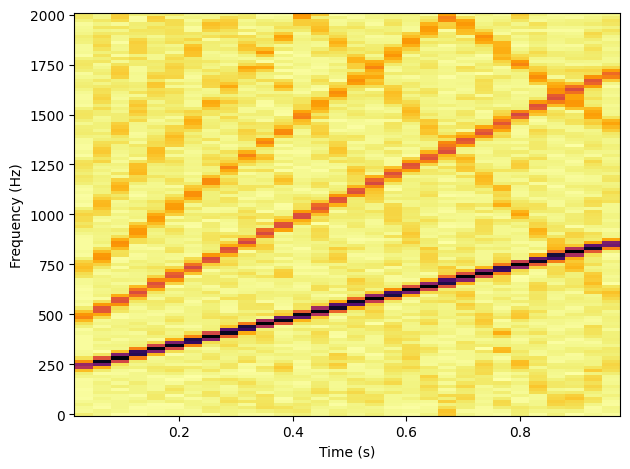

In [22]:
sp = wave.make_spectrogram(256)
sp.plot()
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

The `read_wave` function from the `thinkdsp` module and uses it to read an external audio file named `'613653__melokacool__alarm.wav'`. The `make_audio` method is called on the read waveform to play the audio from the file.

In [19]:
from thinkdsp import read_wave

read_wave('613653__melokacool__alarm.wav').make_audio()

This highlights the effects of aliasing in signal processing. With a low frame rate, you'll notice aliasing artifacts in the spectrogram as harmonics bouncing off a folding frequency, and you'll hear them as a background hiss in the audio. Increasing the frame rate mitigates these effects, resulting in a cleaner signal representation.

## Exercise 3.3:
Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then use it to make a wave
with duration 1 s and framerate 20 kHz. Draw a sketch of what you think the spectrum will
look like. Then plot the `spectrum` and see if you got it right.

`SawtoothChirp` signal is created with a frequency that gradually sweeps from 2500 to 3000 Hz over a duration of 1 second. This means the signal starts with a low frequency and increases to a higher frequency, mimicking a rising pitch sound. The resulting `wave` object represents this signal in a digital form with a sampling rate of 20,000 samples per second.

In [25]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

The `spectrum` represents how the energy in the signal is distributed across different frequencies. Given the frequency sweep characteristics in the `chirp` signal, you would expect to see peaks in the spectrum corresponding to the fundamental `frequency` (2500-3000 Hz) and its `harmonics` (5000-6000 Hz and 7500-9000 Hz). Additionally, due to aliasing and other signal processing effects, energy is distributed across other frequencies, creating an interesting and potentially complex spectrum. The `decorate(xlabel='Frequency (Hz)')` line simply adds a label to the x-axis of the spectrum plot for clarity.

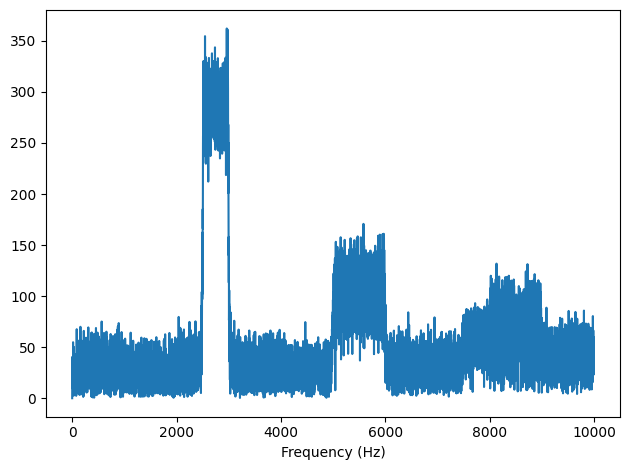

In [26]:
wave.make_spectrum().plot()
decorate(xlabel='Frequency (Hz)')

### Exercise 3.4:
In musical terminology, a `glissando` is a note that slides from one pitch to another, so
it is similar to a `chirp`.
Find or make a recording of a glissando and plot a spectrogram of the first few seconds.

__One suggestion: George Gershwin’s Rhapsody in Blue starts with a famous clarinet glissando,
which you can download from https://archive.org/details/rhapblue11924.__

`Wave` is being assigned a sound wave obtained from an audio file named `72475__rockwehrmann__glissup02.wav`. This reads the audio data from the specified file and loads it into the `wave` variable. This file is expected to contain a recording of a __glissando__, which is a musical term referring to a note that smoothly transitions from one pitch to another. The `read_wave` function, which is not shown in the provided code, is presumably a part of an audio processing library or module used in this Python script. The `wave` variable will then be used for further analysis and visualization of the glissando sound.

In [27]:
wave = read_wave('72475__rockwehrmann__glissup02.wav')
wave.make_audio()

`Wave.make_spectrogram(512)` method is called on the `wave` object. This method generates a spectrogram of the audio data. A spectrogram is a representation of how the frequency content of a signal changes over time. The `512` parameter specifies the window size for the analysis, which determines the time-frequency resolution of the spectrogram.

After generating the spectrogram, the code immediately calls `.plot(high=5000)` on it. This method plots the spectrogram, where the x-axis represents time, the y-axis represents frequency, and the color intensity represents the energy or amplitude of the signal at each time-frequency point. The `high=5000` argument likely sets an upper frequency limit of 5000 Hz for visualization, meaning that only frequency components up to 5000 Hz will be shown in the plot.

Finally, `decorate(xlabel='Time (s), ylabel='Frequency (Hz)')` adds labels to the x-axis `('Time (s)') and y-axis ('Frequency (Hz)')` of the spectrogram plot for clarity.

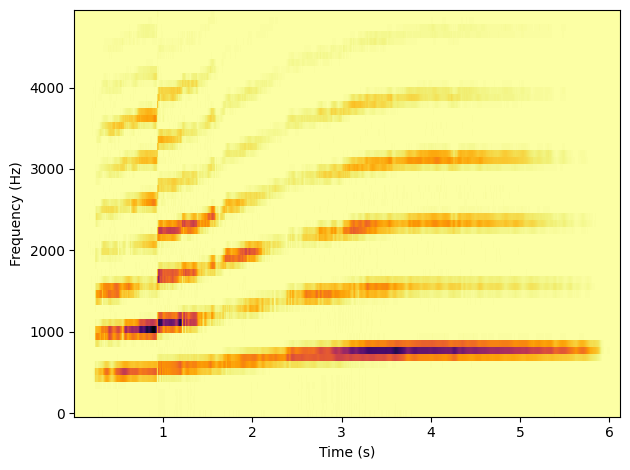

In [28]:
wave.make_spectrogram(512).plot(high=5000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

### Exercise 3.5:
A `trombone player` can play a glissando by extending the trombone slide while blowing
continuously. As the slide extends, the total length of the tube gets longer, and the resulting
pitch is inversely proportional to length.

Assuming that the player moves the slide at a constant speed, how does frequency vary
with time?

Write a class called `TromboneGliss` that extends `Chirp` and provides `evaluate`. Make
a wave that simulates a trombone glissando from C3 up to F3 and back down to C3. C3 is 262
Hz; F3 is 349 Hz.3.9.

Plot a spectrogram of the resulting wave. Is a trombone glissando more like a linear or
exponential chirp?

The `TromboneGliss` class is defined as a subclass of some other class called `Chirp`, which is assumed to have an appropriate constructor. The class has a method evaluate that calculates the waveforms of the trombone glissando at given time points (`ts`). It does this by calculating the lengths and frequencies corresponding to those times, and then using trigonometric functions to generate the waveform. The amplitude of the waveform is scaled by the variable `amp`.

In [34]:
class TromboneGliss(Chirp):
    """Represents a trombone-like signal with varying frequency."""

    def evaluate(self, ts):
        """l1 and l2 are calculated as reciprocals of starting
    and ending frequencies;lengths represents trombone slide lengths over time,
    created using np.linspace; freqs holds the corresponding frequencies,
    calculated as inverses of lengths."""
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths

        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

The first part of the glissando, from `high` (F3, 349 Hz) down to `low` (C3, 262 Hz), is created using the `TromboneGliss` class with these frequency values. The `make_wave` method generates a wave for a specified duration (1 second), and the resulting wave is apodized (smoothed) for better audio quality.

In [35]:
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

The second part of the glissando, from low back up to high, is created in a similar way by `reversing the order of frequency values`.

In [36]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Both waveforms (the descending and ascending parts) are concatenated using the `|` operator, creating a continuous wave that represents the complete trombone glissando.

In [37]:
wave = wave1 | wave2
wave.make_audio()

A spectrogram of the resulting wave is generated using the `make_spectrogram` method with a window size of `1024`. The spectrogram is then plotted to visualize how the frequency changes over time.

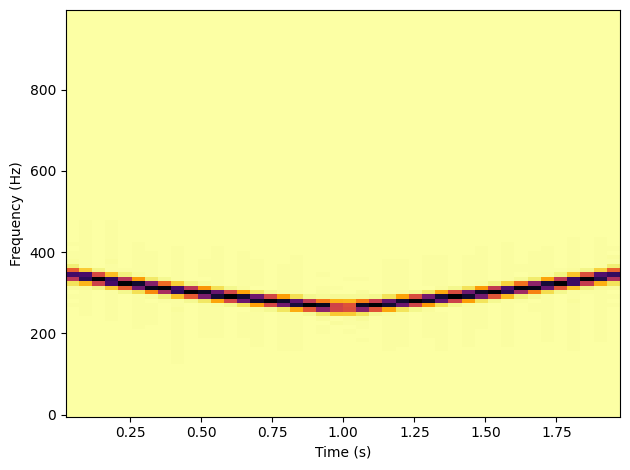

In [33]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

### Exercise 3.6:
Make or find a recording of a series of `vowel sounds` and look at the spectrogram. Can
you identify different vowels?

A wave file named `353028__luisaguacate__voice4.wav`. This file presumably contains the recorded vowel sounds. The `read_wave` function is likely part of the thinkdsp library and is used to load the audio data from the WAV file into a waveform object called `wave`.

In [41]:
wave = read_wave('353028__luisaguacate__voice4.wav')
wave.make_audio()

A spectrogram from the `wave` object using the `make_spectrogram` method. The argument `1024` indicates the window size used for the spectrogram computation. A larger window size can provide better frequency resolution but worse time resolution, while a smaller window size has the opposite trade-off. The spectrogram is then plotted with a maximum frequency of `1000 Hz` using the plot function.

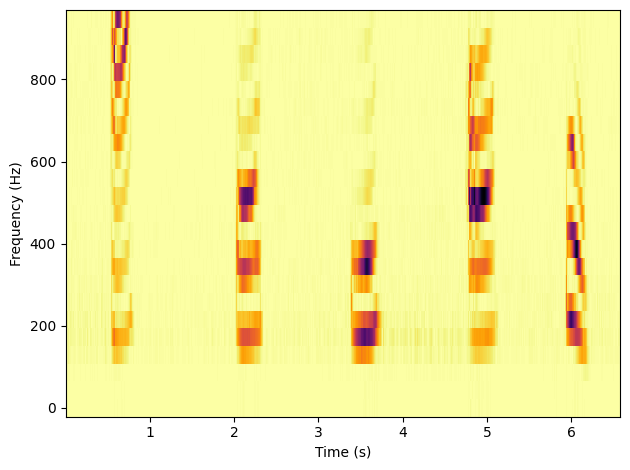

In [42]:
wave.make_spectrogram(1024).plot(high=1000)
decorate(xlabel='Time (s)', ylabel='Frequency (Hz)')

## <center> **© AMBOANG & GIGATARAS (2023) | BCA183 LABORATORY ACTIVITIES** </center>